**Instituto de Informática - UFG**

Disciplina: Inteligência Computacional

Prof. Cedric Luiz de Carvalho


Grupo (Gabriel Olímpio Rocha Leão, Geovanny Magalhães Novais)

---


Analista de dados: Geovanny Magalhães Novais

---

Engenheiro(a) do conhecimento: Gabriel Olímpio Rocha Leão


---


#Especificação do problema : Algoritmos genéticos


# Abrindo o dataframe e análise inicial

* Montando o Google Drive para acessar os dados de entrada

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


* Discretizando as comidas em categorias

In [2]:
import pandas as pd

In [3]:
pd.set_option("max_colwidth", 210)
pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Trabalho6/Supply_Food_Data_Descriptions.csv')

,Categories,Items
0,Alcoholic Beverages,"Alcohol, Non-Food; Beer; Beverages, Alcoholic; Beverages, Fermented; Wine"
1,Animal fats,"Butter, Ghee; Cream; Fats, Animals, Raw; Fish, Body Oil; Fish, Liver Oil"
2,Animal Products,"Aquatic Animals, Others; Aquatic Plants; Bovine Meat; Butter, Ghee; Cephalopods; Cream; Crustaceans; Demersal Fish; Eggs; Fats, Animals, Raw; Fish, Body Oil; Fish, Liver Oil; Freshwater Fish; Marine Fish, O..."
3,"Aquatic Products, Other","Aquatic Animals, Others; Aquatic Plants; Meat, Aquatic Mammals"
4,Cereals - Excluding Beer,"Barley and products; Cereals, Other; Maize and products; Millet and products; Oats; Rice (Milled Equivalent); Rye and products; Sorghum and products; Wheat and products"
5,Eggs,Eggs
6,"Fish, Seafood","Cephalopods; Crustaceans; Demersal Fish; Freshwater Fish; Marine Fish, Other; Molluscs, Other; Pelagic Fish"
7,Fruits - Excluding Wine,"Apples and products; Bananas; Citrus, Other; Dates; Fruits, Other; Grapefruit and products; Grapes and products (excl wine); Lemons, Limes and products; Oranges, Mandarines; Pineapples and products; Plantains"
8,Meat,"Bovine Meat; Meat, Other; Mutton & Goat Meat; Pigmeat; Poultry Meat"
9,Milk - Excluding Butter,Milk - Excluding Butter


* Importando os database, criando os dataframes

---



In [4]:
dfGordura = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Trabalho6/Fat_Supply_Quantity_Data.csv')
dfGordura

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0000,21.6397,6.2224,0.0,8.0353,0.6859,0.0327,0.4246,6.1244,...,17.0831,0.3593,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,0.0000,32.0002,3.4172,0.0,2.6734,1.6448,0.1445,0.6418,8.7428,...,9.2443,0.6503,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.0000,14.4175,0.8972,0.0,4.2035,1.2171,0.2008,0.5772,3.8961,...,27.3606,0.5145,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,0.0000,15.3041,1.3130,0.0,6.5545,0.1539,1.4155,0.3488,11.0268,...,22.4638,0.1231,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,0.0000,27.7033,4.6686,0.0,3.2153,0.3872,1.5263,1.2177,14.3202,...,14.4436,0.2469,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),0.0000,16.3261,2.2673,0.0,2.5449,0.6555,0.5707,0.9640,7.0949,...,29.5211,0.1851,25.2,21.2,0.452585,0.004287,0.424399,0.023899,28645000.0,%
166,Vietnam,0.0000,33.2484,3.8238,0.0,3.7155,0.7839,1.1217,0.4079,26.4292,...,5.6211,0.6373,2.1,9.3,0.002063,0.000036,0.001526,0.000501,96209000.0,%
167,Yemen,0.0000,12.5401,2.0131,0.0,11.5271,0.5514,0.3847,0.2564,8.0010,...,23.6312,0.1667,14.1,38.9,0.007131,0.002062,0.004788,0.000282,29826000.0,%
168,Zambia,0.0783,9.6005,1.6113,0.0,14.3225,0.6266,1.0070,0.1343,4.9010,...,15.2848,0.1567,6.5,46.7,0.334133,0.004564,0.290524,0.039045,18384000.0,%


In [5]:
dfComidaKg = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Trabalho6/Food_Supply_Quantity_kg_Data.csv')
dfComidaKg

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0000,24.8097,0.2099,0.0350,5.3495,1.2020,...,6.7642,40.5645,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0000,5.7817,0.5815,0.2126,6.7861,1.8845,...,11.7753,31.2304,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0000,13.6816,0.5277,0.2416,6.3801,1.1305,...,11.6484,40.3651,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0000,9.1085,0.0587,1.7707,6.0005,2.0571,...,2.3041,45.0722,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0000,5.9960,0.2274,4.1489,10.7451,5.6888,...,5.4495,33.3233,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),2.5952,0.0403,14.7565,0.0000,12.9253,0.3389,0.9456,7.6460,3.8328,...,4.1474,35.2416,25.2,21.2,0.452585,0.004287,0.424399,0.023899,28645000.0,%
166,Vietnam,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,2.6392,5.9029,4.4382,...,11.9508,41.4232,2.1,9.3,0.002063,0.000036,0.001526,0.000501,96209000.0,%
167,Yemen,0.0364,0.0446,5.7874,0.0000,27.2077,0.2579,0.5240,5.1344,2.7871,...,3.2135,44.2126,14.1,38.9,0.007131,0.002062,0.004788,0.000282,29826000.0,%
168,Zambia,5.7360,0.0829,6.0197,0.0000,21.1938,0.3399,1.6924,1.0183,1.8427,...,3.4649,43.9789,6.5,46.7,0.334133,0.004564,0.290524,0.039045,18384000.0,%


In [6]:
 dfComidaKcal = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Trabalho6/Food_Supply_kcal_Data.csv')
 dfComidaKcal

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,...,2.3012,0.7504,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,3.8688,...,2.8244,2.7508,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,...,5.7638,2.0457,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,...,4.2741,0.3525,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,2.3041,15.3672,1.5429,0.0,13.7215,0.2057,1.7280,3.6824,7.0356,...,4.6904,1.2960,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),0.8454,7.2303,0.6007,0.0,21.3126,0.2892,0.4449,2.3804,3.1368,...,7.5417,0.6674,25.2,21.2,0.452585,0.004287,0.424399,0.023899,28645000.0,%
166,Vietnam,0.7150,10.9806,0.9363,0.0,26.9833,0.2894,1.0385,1.8046,7.8311,...,1.3279,1.9578,2.1,9.3,0.002063,0.000036,0.001526,0.000501,96209000.0,%
167,Yemen,0.0000,3.4667,0.3394,0.0,32.0727,0.1455,0.1697,1.1879,2.0121,...,3.9515,0.3636,14.1,38.9,0.007131,0.002062,0.004788,0.000282,29826000.0,%
168,Zambia,1.1925,3.3043,0.3230,0.0,31.5528,0.1988,0.5714,0.2236,1.5155,...,3.0062,0.4472,6.5,46.7,0.334133,0.004564,0.290524,0.039045,18384000.0,%


In [7]:
dfProteina = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Trabalho6/Protein_Supply_Quantity_Data.csv')
dfProteina

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Miscellaneous,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0000,9.7523,0.0277,0.0000,35.9771,0.4067,0.0647,0.5824,3.1337,...,1.1370,0.0462,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,0.1840,27.7469,0.0711,0.0000,14.2331,1.8069,0.6274,1.2757,7.6582,...,3.2456,0.0544,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.0323,13.8360,0.0054,0.0000,26.5633,1.2916,0.6350,1.1624,3.5088,...,3.1267,0.1399,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,0.6285,15.2311,0.0277,0.0000,20.3882,0.1756,5.4436,1.2754,7.6248,...,0.8133,0.0924,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,0.1535,33.1901,0.1289,0.0000,10.5108,0.4850,8.2146,1.2586,16.0670,...,1.6024,0.2947,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),0.1955,22.5411,0.1244,0.0000,21.6526,0.8707,2.6477,1.0662,11.8347,...,1.0129,0.0267,25.2,21.2,0.452585,0.004287,0.424399,0.023899,28645000.0,%
166,Vietnam,0.1555,20.4466,0.1555,0.0056,18.5247,0.7665,5.7435,0.7165,11.0426,...,3.7216,0.0389,2.1,9.3,0.002063,0.000036,0.001526,0.000501,96209000.0,%
167,Yemen,0.0000,10.0122,0.0188,0.0000,35.1179,0.4320,0.9392,0.4884,5.9453,...,0.5448,0.0564,14.1,38.9,0.007131,0.002062,0.004788,0.000282,29826000.0,%
168,Zambia,0.4824,9.8925,0.0338,0.0000,28.5182,0.5839,3.0126,0.0931,4.3158,...,0.8039,0.0592,6.5,46.7,0.334133,0.004564,0.290524,0.039045,18384000.0,%


# Verificando a presença de dados faltantes

In [8]:
dfGordura.isna().any()

Country                         False
Alcoholic Beverages             False
Animal Products                 False
Animal fats                     False
Aquatic Products, Other         False
Cereals - Excluding Beer        False
Eggs                            False
Fish, Seafood                   False
Fruits - Excluding Wine         False
Meat                            False
Miscellaneous                   False
Milk - Excluding Butter         False
Offals                          False
Oilcrops                        False
Pulses                          False
Spices                          False
Starchy Roots                   False
Stimulants                      False
Sugar Crops                     False
Sugar & Sweeteners              False
Treenuts                        False
Vegetal Products                False
Vegetable Oils                  False
Vegetables                      False
Obesity                          True
Undernourished                   True
Confirmed   

In [9]:
dfComidaKg.isna().any()

Country                         False
Alcoholic Beverages             False
Animal fats                     False
Animal Products                 False
Aquatic Products, Other         False
Cereals - Excluding Beer        False
Eggs                            False
Fish, Seafood                   False
Fruits - Excluding Wine         False
Meat                            False
Milk - Excluding Butter         False
Miscellaneous                   False
Offals                          False
Oilcrops                        False
Pulses                          False
Spices                          False
Starchy Roots                   False
Stimulants                      False
Sugar & Sweeteners              False
Sugar Crops                     False
Treenuts                        False
Vegetable Oils                  False
Vegetables                      False
Vegetal Products                False
Obesity                          True
Undernourished                   True
Confirmed   

In [10]:
dfComidaKcal.isna().any()

Country                         False
Alcoholic Beverages             False
Animal Products                 False
Animal fats                     False
Aquatic Products, Other         False
Cereals - Excluding Beer        False
Eggs                            False
Fish, Seafood                   False
Fruits - Excluding Wine         False
Meat                            False
Milk - Excluding Butter         False
Miscellaneous                   False
Offals                          False
Oilcrops                        False
Pulses                          False
Spices                          False
Starchy Roots                   False
Stimulants                      False
Sugar Crops                     False
Sugar & Sweeteners              False
Treenuts                        False
Vegetal Products                False
Vegetable Oils                  False
Vegetables                      False
Obesity                          True
Undernourished                   True
Confirmed   

In [11]:
dfProteina.isna().any()

Country                         False
Alcoholic Beverages             False
Animal Products                 False
Animal fats                     False
Aquatic Products, Other         False
Cereals - Excluding Beer        False
Eggs                            False
Fish, Seafood                   False
Fruits - Excluding Wine         False
Meat                            False
Milk - Excluding Butter         False
Offals                          False
Oilcrops                        False
Pulses                          False
Spices                          False
Starchy Roots                   False
Stimulants                      False
Sugar Crops                     False
Sugar & Sweeteners              False
Treenuts                        False
Vegetal Products                False
Vegetable Oils                  False
Vegetables                      False
Miscellaneous                   False
Obesity                          True
Undernourished                   True
Confirmed   

Após as verificações, concluímos que as colunas Obesity, Undernourished, Confirmed, Deaths, Recovered e Active possuem NaNs.

## Unificando as bases de dados e tratando-as

* Definindo quais colunas seriam comparadas para juntar os dataframes

In [12]:
colunasAlvoMerge = [
    'Country',
    'Obesity',
    'Confirmed',
    'Deaths',
    'Recovered',
    'Active',
    'Population',
    'Undernourished',
    'Unit (all except Population)',
]

comum = dfGordura[colunasAlvoMerge[:-1]]

* Removendo as colunas em comum e adicionando '(nome do dataframe antigo)' nas demais

In [13]:
dfGordura = dfGordura.drop(columns=colunasAlvoMerge)
dfComidaKg = dfComidaKg.drop(columns=colunasAlvoMerge)
dfComidaKcal = dfComidaKcal.drop(columns=colunasAlvoMerge)
dfProteina= dfProteina.drop(columns=colunasAlvoMerge)

colunasRelacionadas = [comum, dfGordura, dfComidaKg, dfComidaKcal, dfProteina]
dados = pd.concat(colunasRelacionadas, axis=1) 
dados

,Country,Obesity,Confirmed,Deaths,Recovered,Active,Population,Undernourished,Alcoholic Beverages,Animal Products,...,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Miscellaneous
0,Afghanistan,4.5,0.142134,0.006186,0.123374,0.012574,38928000.0,29.8,0.0000,21.6397,...,0.1664,0.1941,0.5546,0.0000,0.0000,0.1387,40.2477,0.0000,1.1370,0.0462
1,Albania,22.3,2.967301,0.050951,1.792636,1.123714,2838000.0,6.2,0.0000,32.0002,...,0.0000,0.8867,0.2635,0.0000,0.0042,0.2677,22.2552,0.0084,3.2456,0.0544
2,Algeria,26.6,0.244897,0.006558,0.167572,0.070767,44357000.0,3.9,0.0000,14.4175,...,0.1776,1.4638,0.4628,0.0000,0.0000,0.2745,36.1694,0.0269,3.1267,0.1399
3,Angola,6.8,0.061687,0.001461,0.056808,0.003419,32522000.0,25,0.0000,15.3041,...,0.0000,5.1941,0.1017,0.0000,0.0092,0.0092,34.7782,0.0092,0.8133,0.0924
4,Antigua and Barbuda,19.1,0.293878,0.007143,0.190816,0.095918,98000.0,NaN,0.0000,27.7033,...,0.3438,0.4666,0.4113,0.0000,0.0000,0.0737,16.8161,0.0430,1.6024,0.2947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),25.2,0.452585,0.004287,0.424399,0.023899,28645000.0,21.2,0.0000,16.3261,...,0.0000,1.1195,0.3287,0.0000,0.0178,0.0000,27.4545,0.0533,1.0129,0.0267
166,Vietnam,2.1,0.002063,0.000036,0.001526,0.000501,96209000.0,9.3,0.0000,33.2484,...,0.5221,0.2333,0.5444,0.0167,0.0056,0.3277,29.5617,0.0000,3.7216,0.0389
167,Yemen,14.1,0.007131,0.002062,0.004788,0.000282,29826000.0,38.9,0.0000,12.5401,...,0.0657,0.2066,0.3193,0.0000,0.0000,0.0188,39.9831,0.0000,0.5448,0.0564
168,Zambia,6.5,0.334133,0.004564,0.290524,0.039045,18384000.0,46.7,0.0783,9.6005,...,0.0846,1.2863,0.0762,0.0000,0.0000,0.0000,40.1117,0.0000,0.8039,0.0592


* Removendo as linhas com dados faltantes, no novo dataframe 'fundido'

In [14]:
dados.dropna(inplace=True)
dados

,Country,Obesity,Confirmed,Deaths,Recovered,Active,Population,Undernourished,Alcoholic Beverages,Animal Products,...,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Miscellaneous
0,Afghanistan,4.5,0.142134,0.006186,0.123374,0.012574,38928000.0,29.8,0.0000,21.6397,...,0.1664,0.1941,0.5546,0.0000,0.0000,0.1387,40.2477,0.0000,1.1370,0.0462
1,Albania,22.3,2.967301,0.050951,1.792636,1.123714,2838000.0,6.2,0.0000,32.0002,...,0.0000,0.8867,0.2635,0.0000,0.0042,0.2677,22.2552,0.0084,3.2456,0.0544
2,Algeria,26.6,0.244897,0.006558,0.167572,0.070767,44357000.0,3.9,0.0000,14.4175,...,0.1776,1.4638,0.4628,0.0000,0.0000,0.2745,36.1694,0.0269,3.1267,0.1399
3,Angola,6.8,0.061687,0.001461,0.056808,0.003419,32522000.0,25,0.0000,15.3041,...,0.0000,5.1941,0.1017,0.0000,0.0092,0.0092,34.7782,0.0092,0.8133,0.0924
5,Argentina,28.5,4.356147,0.108227,3.905192,0.342729,45377000.0,4.6,0.0000,30.3572,...,0.0292,1.3096,0.9688,0.0000,0.0049,0.0438,18.0176,0.0000,1.0516,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),25.2,0.452585,0.004287,0.424399,0.023899,28645000.0,21.2,0.0000,16.3261,...,0.0000,1.1195,0.3287,0.0000,0.0178,0.0000,27.4545,0.0533,1.0129,0.0267
166,Vietnam,2.1,0.002063,0.000036,0.001526,0.000501,96209000.0,9.3,0.0000,33.2484,...,0.5221,0.2333,0.5444,0.0167,0.0056,0.3277,29.5617,0.0000,3.7216,0.0389
167,Yemen,14.1,0.007131,0.002062,0.004788,0.000282,29826000.0,38.9,0.0000,12.5401,...,0.0657,0.2066,0.3193,0.0000,0.0000,0.0188,39.9831,0.0000,0.5448,0.0564
168,Zambia,6.5,0.334133,0.004564,0.290524,0.039045,18384000.0,46.7,0.0783,9.6005,...,0.0846,1.2863,0.0762,0.0000,0.0000,0.0000,40.1117,0.0000,0.8039,0.0592


* Removendo as linhas com dados faltantes, no dataframe kcal

In [30]:
dfComidaKcal.dropna(inplace = True) 
dfComidaKcal

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,...,Pulses,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables
0,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,2.4512,...,0.5003,0.1001,0.3252,0.0750,0.0000,2.2261,0.1251,45.2476,2.3012,0.7504
1,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,3.8688,9.9441,...,0.8091,0.0000,1.2651,0.2501,0.0000,3.4422,0.3972,33.9070,2.8244,2.7508
2,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,3.9869,...,1.0900,0.1195,1.9262,0.1493,0.0000,3.9869,0.2240,43.9749,5.7638,2.0457
3,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,0.5067,...,1.4981,0.0000,12.6239,0.0441,0.0000,2.7539,0.0000,45.3184,4.2741,0.3525
4,2.3041,15.3672,1.5429,0.0,13.7215,0.2057,1.7280,3.6824,7.0356,4.6904,...,0.4526,0.3497,0.8434,0.4937,0.0000,5.8218,0.0823,34.6225,4.6904,1.2960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.8454,7.2303,0.6007,0.0,21.3126,0.2892,0.4449,2.3804,3.1368,2.6474,...,0.7341,0.0000,1.3571,0.0667,0.0000,7.7864,0.0000,42.7586,7.5417,0.6674
166,0.7150,10.9806,0.9363,0.0,26.9833,0.2894,1.0385,1.8046,7.8311,0.5618,...,0.4597,0.4256,0.7150,0.1021,0.1532,2.0940,0.3575,39.0364,1.3279,1.9578
167,0.0000,3.4667,0.3394,0.0,32.0727,0.1455,0.1697,1.1879,2.0121,0.6545,...,1.2121,0.0485,0.3152,0.1212,0.0000,7.0303,0.0242,46.5455,3.9515,0.3636
168,1.1925,3.3043,0.3230,0.0,31.5528,0.1988,0.5714,0.2236,1.5155,0.5217,...,0.2981,0.0745,4.0994,0.0248,0.0000,2.5590,0.0000,46.7081,3.0062,0.4472


# Observando graficamente os dados

* Importando a biblioteca que cria os gráficos





In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

* Criando heatmap para avaliar o grau de dependência entre cada variável

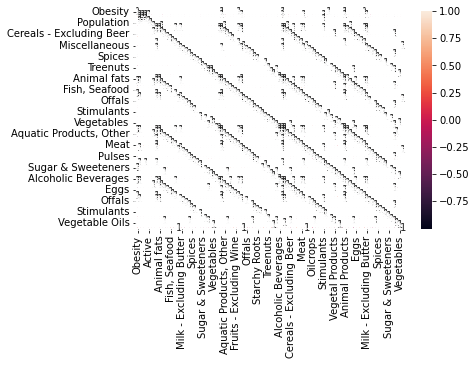

In [16]:
correlacao = dados.corr()

matrizCorrelacao = sns.heatmap(correlacao, annot = True, fmt='1.0f', linewidths=.9)
matrizCorrelacao

#Gerando a nova base de dados

* Verificando o tamanho da nova base de dados, após tratamento

In [17]:
dados.shape

(154, 100)

In [18]:
pd.set_option("max_rows", 100)
dados.dtypes

Country                      object
Obesity                     float64
Confirmed                   float64
Deaths                      float64
Recovered                   float64
Active                      float64
Population                  float64
Undernourished               object
Alcoholic Beverages         float64
Animal Products             float64
Animal fats                 float64
Aquatic Products, Other     float64
Cereals - Excluding Beer    float64
Eggs                        float64
Fish, Seafood               float64
Fruits - Excluding Wine     float64
Meat                        float64
Miscellaneous               float64
Milk - Excluding Butter     float64
Offals                      float64
Oilcrops                    float64
Pulses                      float64
Spices                      float64
Starchy Roots               float64
Stimulants                  float64
Sugar Crops                 float64
Sugar & Sweeteners          float64
Treenuts                    

* Notamos que as únicas colunas que não são float64 são:

1.   O país/country, que por tratar de nomes, não deveria ser flutuante mesmo.
2.   A coluna sobre desnutrição/undernourished, que trata de valores percentuais numéricos, deveria ser flutuante.
* Notamos o erro, existem algumas linhas descrevendo os dados como: <2.5
* Para solucionar isso, normalizamos todos os valores marcados como menor que 2.5 para o valor arbitrário 1.23 



In [22]:
dados['Undernourished'] = dados['Undernourished'].str.replace('<2.5', '1.23')
dados['Undernourished'] = dados['Undernourished'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
pd.set_option("max_rows", 100)
dados.dtypes

Country                      object
Obesity                     float64
Confirmed                   float64
Deaths                      float64
Recovered                   float64
Active                      float64
Population                  float64
Undernourished              float64
Alcoholic Beverages         float64
Animal Products             float64
Animal fats                 float64
Aquatic Products, Other     float64
Cereals - Excluding Beer    float64
Eggs                        float64
Fish, Seafood               float64
Fruits - Excluding Wine     float64
Meat                        float64
Miscellaneous               float64
Milk - Excluding Butter     float64
Offals                      float64
Oilcrops                    float64
Pulses                      float64
Spices                      float64
Starchy Roots               float64
Stimulants                  float64
Sugar Crops                 float64
Sugar & Sweeteners          float64
Treenuts                    

Como pôde ser visto acima, solucionando o dilema da dissonância de tipos

* Criando os arquivos csvs dos dataframes, já tratados, para a equipe de implementação

In [24]:
dados.to_csv('/content/drive/MyDrive/ColabNotebooks/Trabalho6/unidos.csv')

In [31]:
dfComidaKcal.to_csv('/content/drive/MyDrive/ColabNotebooks/Trabalho6/Kcal.csv')